<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QiskitRuntimeLocalTestingMode_CliffordCircuitSimulator_AerSimulator_Sampler_Primitives_mkbahk_20241105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AerSimulator를 이용한 Clifford 시뮬레이션

[AerSimulator examples](https://docs.quantum.ibm.com/guides/local-testing-mode#aersimulator-examples)

In [70]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-ibm-runtime==0.30.0
%pip install qiskit-transpiler-service==0.4.10
%pip install qiskit-aer==0.15.1

In [2]:
%pip show qiskit qiskit-ibm-runtime qiskit-transpiler-service qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-transpiler-service


#FakeProvider는 지원할 수 있는 Qubit 숫자, V1, V2 지원등 많이 차이납니다. 사용 전 확인필요
[Qiskit Docs: FakeProvider](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider)

In [100]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [101]:
n_qubits = 500  # <---- note this uses 500 qubits!
circuit = EfficientSU2(n_qubits)
circuit.measure_all()

In [94]:
#circuit.draw("mpl")

In [109]:
rng = np.random.default_rng(1234)
params = rng.choice(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2],
    size=circuit.num_parameters,
)

In [111]:
# Bind the parameter values to the circuit before running the sampler
# Instead of bind_parameters, use assign_parameters
bound_isa_qc = isa_qc.assign_parameters(params)

In [112]:
# Tell Aer to use the stabilizer (clifford) simulation method
aer_sim = AerSimulator(method="stabilizer")

In [113]:
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(circuit)

In [97]:
#isa_qc.draw("mpl")

In [114]:
sampler = Sampler(mode=aer_sim)
result = sampler.run([bound_isa_qc]).result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=500>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})

In [115]:
counts = result[0].data.meas.get_counts()
counts

{'01110111101110100111100001000111110011101000011001100100010011110001101110110110101000101110011111110111011100000110001111000010101000001001110010111100100110011100100000010011101111011010001000110100111011000100000010011011111101000111110001101100011111011010111010010100111111101101110000001010011001100111110001001111111101100100100000111110101000011011110101100010100110101000111101110110010100110000101111000110111010100101110000011000111000000000101010001000011100110100110100011101011001101000': 1,
 '1110110011111101111110110101100111110110000000110110110000100101100101110101111110100010000001001001011000110010000111010010011101110010100001010110110110011110001111010010100100111010101110010000011101100010100000111110101011110110111000111011101110110000111101101101110111100100011111001100111100111011010101111011101100100001110111110001111110010110111011100000111100111110000000001001111111001001000111011001000010001011110000110010101010010010101111011000001100010100010111010001111001

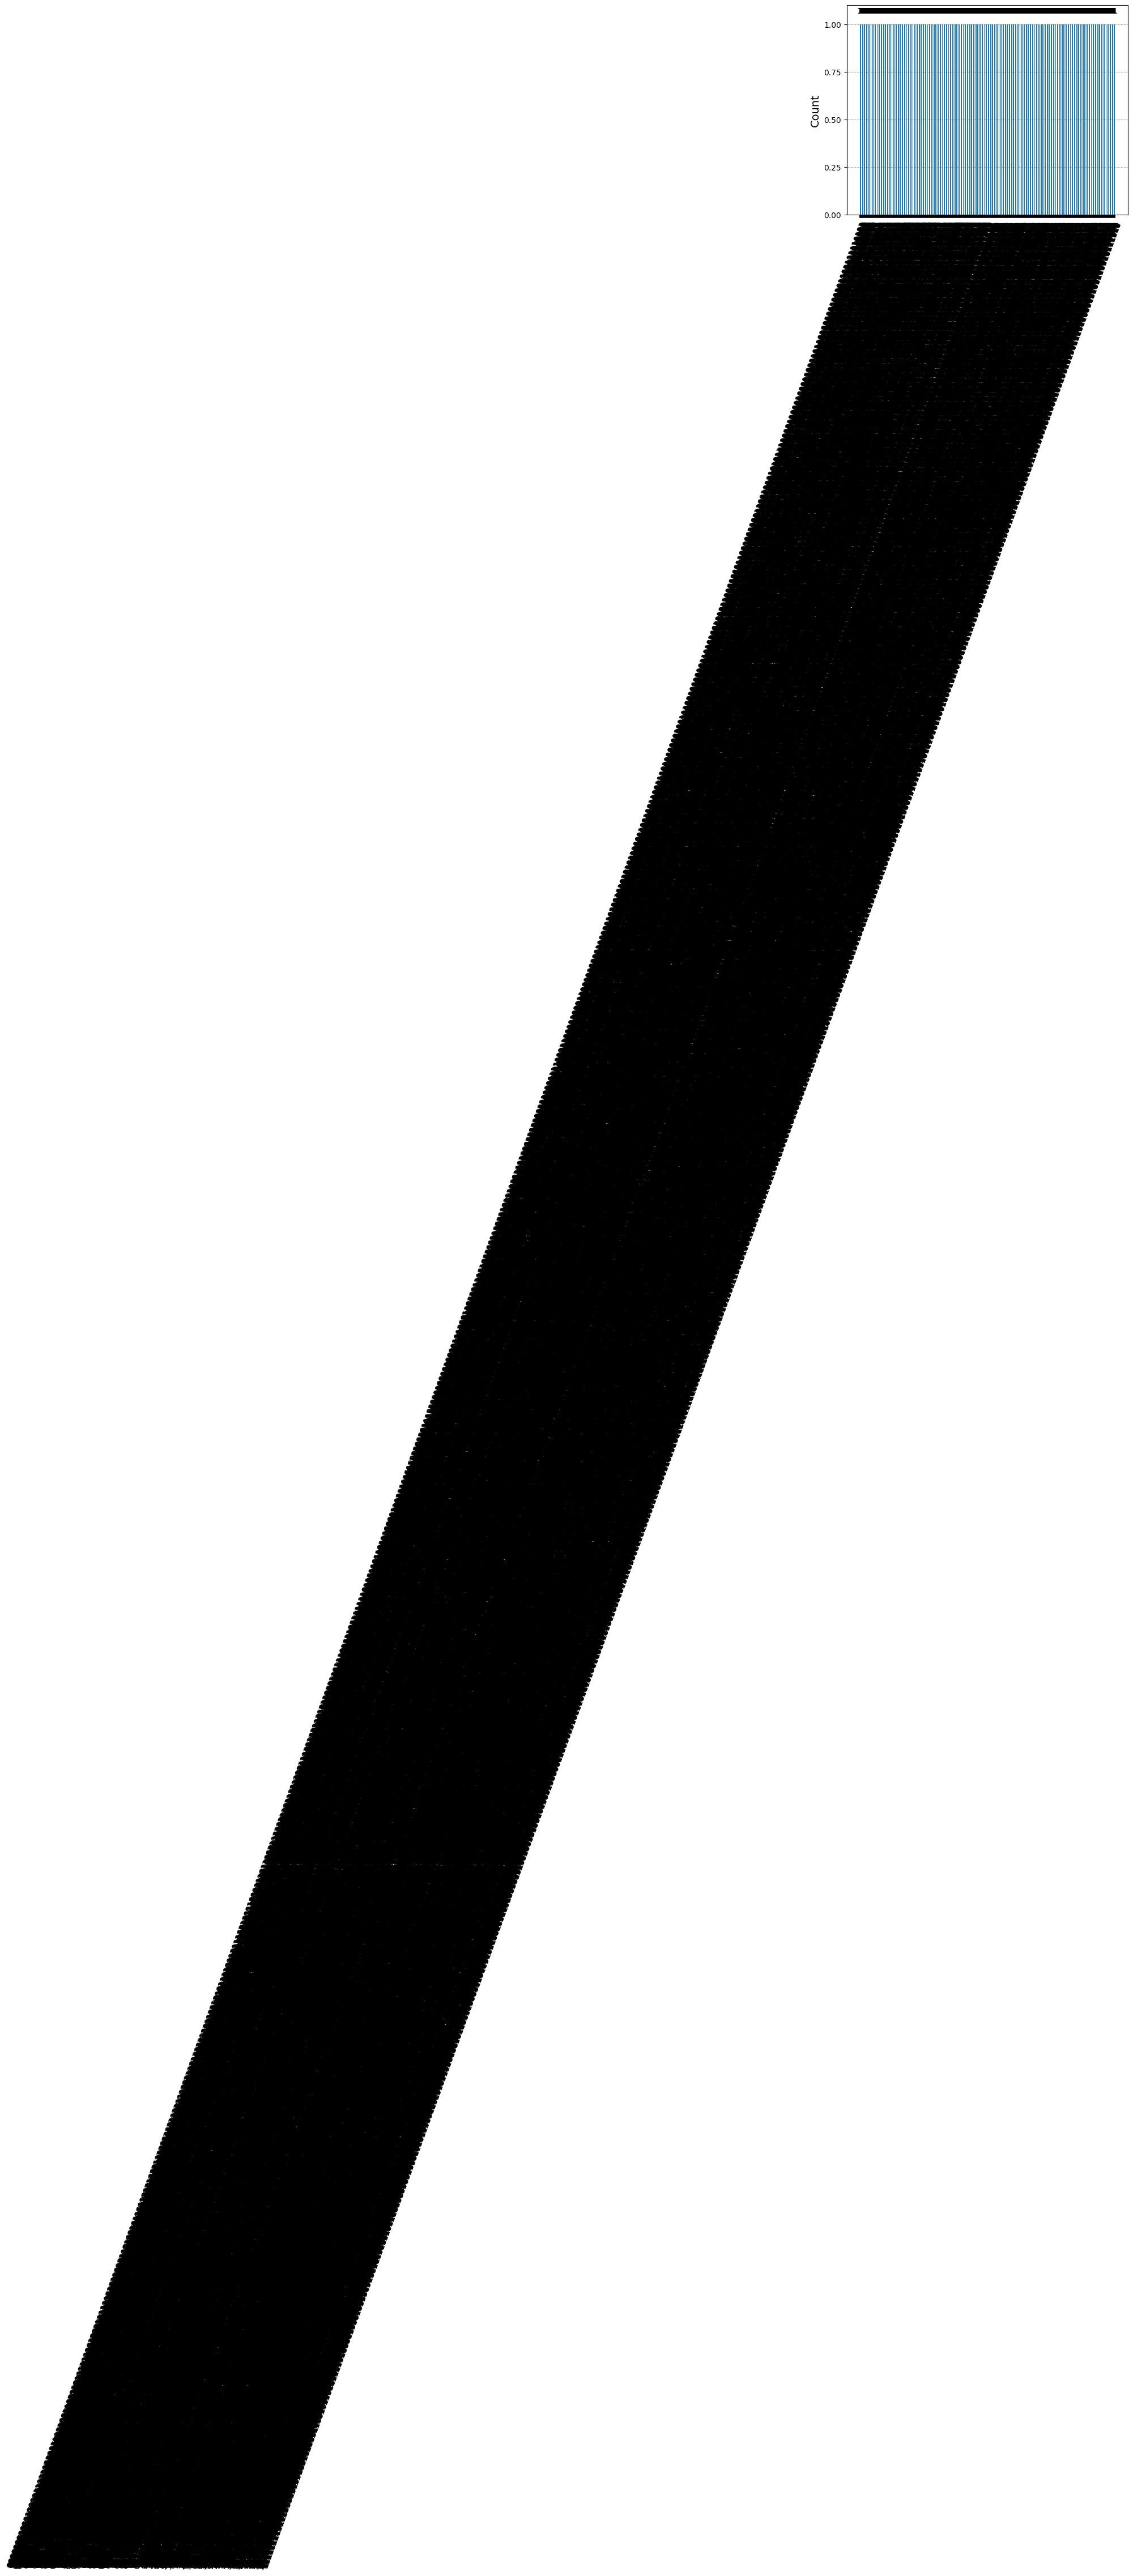

In [116]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)